# A/B Statistical Analysis

### In this analysis, I was presented with various ads to test against a site's current ad. I wanted to see which ad had the greatest amount of purchase conversions which would then indicate the more effective ad to use on the website. Based off of user feedback the site was getting while using the current ad, I decided to use an A/B test in order to test against the ad model I hypothesized to have a better outcome.

* The ad with the best outcome was Ad C with approximately 700 more click conversions
* The current Ad was significantly lower in conversions for a number of qualitative reasons such as: misleading information, poor advertisement design, and unaware of product features.

###### For confidentiality, the ads from the site are not to be presented for this public notebook as they were used for A/B testing within the company.

In [77]:
#import all necessary libraries
import numpy as np
#data analysis tools
import pandas as pd
#import sql database
import sqlite3
#use statistical testing
import scipy as sp
from scipy import stats
#create data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
#create your database and connection to join tables using sql queries
database = "codecademy_sqlite_adc.db"
connection = sqlite3.connect(database)

In [79]:
#assign the dataframe to the sql query
df = pd.read_sql_query("""
SELECT *
FROM CurrentAd
UNION
SELECT *
FROM GroupC
""", connection)

In [80]:
#view the dataframe to view columns and format of data
df.head()

,index,uuid,num_achievements,num_exercises,num_points,Click,Group,Button,Banner
0,0,981943945,0,0,0,1.0,CurrentAd,No,Yes
1,2,981944745,0,0,0,0.0,CurrentAd,No,Yes
2,3,981944801,0,0,0,0.0,CurrentAd,No,Yes
3,4,981944857,0,0,0,0.0,CurrentAd,No,Yes
4,6,981960025,0,0,0,0.0,CurrentAd,No,Yes


In [81]:
#look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26214 entries, 0 to 26213
Data columns (total 9 columns):
index               26214 non-null int64
uuid                26214 non-null int64
num_achievements    26214 non-null int64
num_exercises       26214 non-null int64
num_points          26214 non-null int64
Click               26214 non-null float64
Group               26214 non-null object
Button              26214 non-null object
Banner              26214 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 1.8+ MB


In [82]:
#reassign data types for data manipulation
df['Group'] = df['Group'].astype('category')
df['Button'] = df['Button'].astype('category')
df['Banner'] = df['Banner'].astype('category')

In [83]:
#view the new data types to see if they were changed correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26214 entries, 0 to 26213
Data columns (total 9 columns):
index               26214 non-null int64
uuid                26214 non-null int64
num_achievements    26214 non-null int64
num_exercises       26214 non-null int64
num_points          26214 non-null int64
Click               26214 non-null float64
Group               26214 non-null category
Button              26214 non-null category
Banner              26214 non-null category
dtypes: category(3), float64(1), int64(5)
memory usage: 1.3 MB


In [84]:
#view any null values-- since there are none we may proceed with the analysis
df.isnull().sum()

index               0
uuid                0
num_achievements    0
num_exercises       0
num_points          0
Click               0
Group               0
Button              0
Banner              0
dtype: int64

In [85]:
#view descriptive statistics to view if there any outliers in the data
df.describe()

,index,uuid,num_achievements,num_exercises,num_points,Click
count,26214.000000,2.621400e+04,26214.000000,26214.000000,26214.000000,26214.000000
mean,41903.245098,1.039720e+09,4.306210,25.207065,25.207065,0.056687
std,44251.550951,6.743032e+07,9.382253,59.754837,59.754837,0.231248
min,0.000000,9.616265e+08,0.000000,0.000000,0.000000,0.000000
25%,9524.750000,9.820949e+08,0.000000,0.000000,0.000000,0.000000
50%,19040.000000,9.845606e+08,0.000000,0.000000,0.000000,0.000000
75%,77626.500000,1.099313e+09,4.000000,17.000000,17.000000,0.000000
max,148303.000000,1.118686e+09,95.000000,673.000000,673.000000,1.000000


In [86]:
#change the sample size so that there is an equal number of users in each advertisement sample
df.sample(12000, replace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26214 entries, 0 to 26213
Data columns (total 9 columns):
index               26214 non-null int64
uuid                26214 non-null int64
num_achievements    26214 non-null int64
num_exercises       26214 non-null int64
num_points          26214 non-null int64
Click               26214 non-null float64
Group               26214 non-null category
Button              26214 non-null category
Banner              26214 non-null category
dtypes: category(3), float64(1), int64(5)
memory usage: 1.3 MB


In [95]:
#clicks over impressions = CTR (click through rate)
group_c_clicks = (group_c['Click'].sum()) / (group_c['Click'].count())
current_ad_clicks = (current_ad['Click'].sum()) / (current_ad['Click'].count())
print group_c_clicks
print current_ad_clicks

0.0900833333333
0.0276666666667


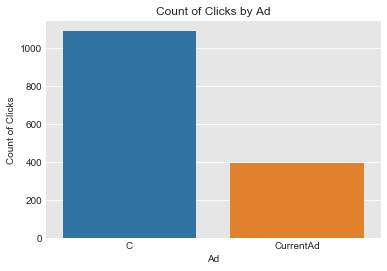

In [107]:
#visualize the clicks from Ad C to the Current Ad
Clicks = df[df['Click'] == 1].head(12000)
sns.countplot(x=Clicks['Group'], data = df)
sns.set_style("darkgrid", {"axes.facecolor": ".9",'text.color': 'w'})
plt.legend()
plt.xlabel('Ad')
plt.ylabel('Count of Clicks')
plt.title("Count of Clicks by Ad")

#### Since the p-value is less than the alpha (0.05), the t-test indicates a statistical significance between the number of clicks in each ad

In [103]:
#subset the two groups in order to run the ttest
group_c = df[df['Group'] == 'C'].head(12000)
current_ad = df[df['Group'] == 'CurrentAd'].head(12000)
alpha = .05
sp.stats.ttest_ind(group_c['Click'], current_ad['Click'])

Ttest_indResult(statistic=20.721437830380211, pvalue=1.4942343968321717e-94)